In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

In [2]:
from sklearn.datasets import make_blobs
from sklearn.cluster import MeanShift, estimate_bandwidth

In [3]:
dataset = make_blobs(n_samples=10_000, centers=3, random_state=42)
total_samples = dataset[0].shape[0]
r_train, r_cal, r_test = 0.6, 0.2, 0.2
assert r_train + r_cal + r_test == 1
Z_train = dataset[0][: int(total_samples * r_train)]
Z_cal = dataset[0][
    int(total_samples * r_train) : int(total_samples * r_train)
    + int(total_samples * r_cal)
]
Z_test = dataset[0][int(total_samples * r_train) + int(total_samples * r_cal) :]
Z_eval = dataset[0][int(total_samples * r_train):]

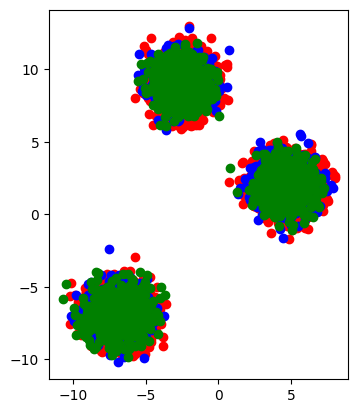

In [4]:
plt.scatter(Z_train[:, 0], Z_train[:, 1], color="red", marker="o", label="train")
plt.scatter(Z_cal[:, 0], Z_cal[:, 1], color="blue", marker="o", label="cal")
plt.scatter(Z_test[:, 0], Z_test[:, 1], color="green", marker="o", label="test")
plt.gca().set_aspect("equal")

In [5]:
from conformal_region_designer.density_estimation import KDE
from conformal_region_designer.clustering import MeanShiftClustering
from conformal_region_designer.shapes import Ellipse
from conformal_region_designer.conformity_optimizer import ConformalRegion

In [6]:
DELTA = 0.95
de = KDE()
cl = MeanShiftClustering()
pcr = ConformalRegion(de, cl, Ellipse, DELTA)

In [7]:
pcr.fit(Z_train)

(4_w,9)-aCMA-ES (mu_w=2.8,w_1=49%) in dimension 6 (seed=351861, Fri Nov 17 20:45:43 2023)
Iterat #Fevals   function value  axis ratio  sigma  min&max std  t[m:s]
    1      9 6.008233344650971e+01 1.0e+00 1.05e+00  1e+00  1e+00 0:00.0
    2     18 7.461201841745557e+01 1.3e+00 1.30e+00  1e+00  1e+00 0:00.1
    3     27 7.543496068216557e+01 1.5e+00 1.37e+00  1e+00  1e+00 0:00.1
  100    900 1.048308942292358e+01 7.9e+01 3.24e-02  3e-03  5e-02 0:02.5
  200   1800 1.046789751229733e+01 1.6e+03 1.27e-03  9e-05  2e-03 0:05.0
  300   2700 1.046788671295178e+01 1.0e+05 3.24e-06  2e-07  8e-06 0:07.6


/usr/local/lib/python3.10/site-packages/cma/utilities/utils.py:343: UserWarning: 
        geno-pheno transformation introduced based on the
        current covariance matrix with condition 1.0e+12 -> 1.0e+00,
        injected solutions become "invalid" in this iteration (class=CMAEvolutionStrategy method=alleviate_conditioning iteration=356)
  warnings.warn(msg + ' (' +


  400   3600 1.046788671145092e+01 3.4e+00 4.10e-06  3e-06  5e-06 0:10.1
  500   4500 1.046788671131188e+01 1.4e+01 5.79e-06  1e-06  5e-06 0:12.6
  600   5400 1.046788671117518e+01 2.4e+01 4.95e-07  9e-08  2e-07 0:15.1
  700   6300 1.046788671124316e+01 1.3e+02 1.94e-07  1e-08  5e-08 0:17.6
  726   6534 1.046788671124034e+01 1.8e+02 2.44e-07  2e-08  6e-08 0:18.3
termination on noeffectaxis=None (Fri Nov 17 20:46:02 2023)
final/bestever f-value = 1.046789e+01 1.046789e+01 after 6535/4724 evaluations
incumbent solution: [2.606618340316345, 6.646546352458245, 6.175968710595043, -2.1041445540649875, -2.515640780737158, 9.083239083098306]
std deviation: [2.2478398941889668e-08, 2.1223134853454913e-08, 3.151510861165984e-08, 4.6704533044422504e-08, 1.6537831250188715e-08, 6.094018254617708e-08]
[array([[44.93719126,  4.32989608],
       [ 4.32989608, 48.60412437]])]
[array([-2.51564035,  9.08323934])]
Soln time: 18.713704109191895
(4_w,9)-aCMA-ES (mu_w=2.8,w_1=49%) in dimension 6 (seed=33456

/usr/local/lib/python3.10/site-packages/cma/utilities/utils.py:343: UserWarning: 
        geno-pheno transformation introduced based on the
        current covariance matrix with condition 1.0e+12 -> 1.0e+00,
        injected solutions become "invalid" in this iteration (class=CMAEvolutionStrategy method=alleviate_conditioning iteration=358)
  warnings.warn(msg + ' (' +


  400   3600 1.236841466477109e+01 7.8e+00 1.95e-07  1e-07  3e-07 0:09.7
  500   4500 1.236841466473568e+01 3.7e+01 2.29e-07  7e-08  3e-07 0:12.2
  575   5175 1.236841466475858e+01 8.1e+01 1.88e-07  3e-08  3e-07 0:14.0
termination on tolstagnation=256 (Fri Nov 17 20:46:16 2023)
final/bestever f-value = 1.236841e+01 1.236841e+01 after 5176/3041 evaluations
incumbent solution: [5.790840743407898, 0.9851309726072941, 0.5439346620405558, -5.3974967738904525, 4.740147810298367, 1.8692920745088486]
std deviation: [8.715231131855861e-08, 9.489840223003415e-08, 2.6692800109327365e-07, 7.711364600359027e-08, 3.410852943397365e-08, 6.965947697332612e-08]
[array([[33.82966182,  2.76885393],
       [ 2.76885393, 30.10341466]])]
[array([4.74014806, 1.8692922 ])]
Soln time: 14.385188102722168
(4_w,9)-aCMA-ES (mu_w=2.8,w_1=49%) in dimension 6 (seed=392146, Fri Nov 17 20:46:16 2023)
Iterat #Fevals   function value  axis ratio  sigma  min&max std  t[m:s]
    1      9 1.767664811876405e+02 1.0e+00 9.05e

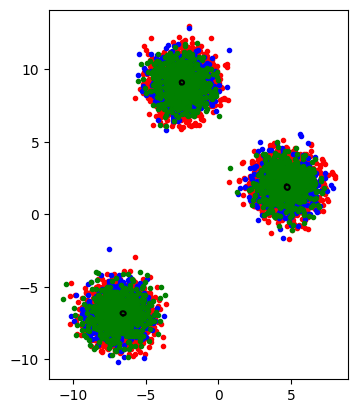

In [8]:
fig, ax = plt.subplots()
ax.scatter(Z_train[:, 0], Z_train[:, 1], color="red", marker=".", label="train")
ax.scatter(Z_cal[:, 0], Z_cal[:, 1], color="blue", marker=".", label="cal")
ax.scatter(Z_test[:, 0], Z_test[:, 1], color="green", marker=".", label="test")
ax.set_aspect("equal")
for shape_template in pcr.shapes:
    shape_template.plot(ax)

In [9]:
pcr.normalizing_constant = np.ones_like(pcr.normalizing_constant)

In [10]:
pcr.conformalize(Z_cal, debug=True)

Target score: 250.20621517887986


In [11]:
scores = pcr.calculate_scores(Z_test)
coverage = np.sum(scores < 0) / len(scores)
print("Test Coverage: ", coverage)
scores = pcr.calculate_scores(Z_cal)
coverage = np.sum(scores < 0) / len(scores)
print("Calibration Coverage: ", coverage)


Test Coverage:  0.9535
Calibration Coverage:  0.9505


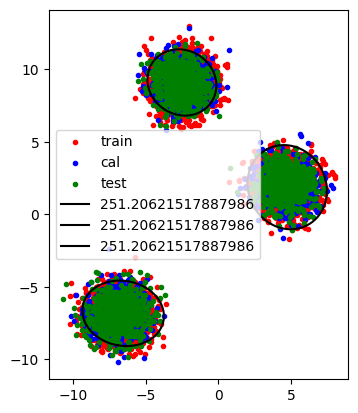

In [12]:
fig, ax = plt.subplots()
ax.scatter(Z_train[:, 0], Z_train[:, 1], color="red", marker=".", label="train")
ax.scatter(Z_cal[:, 0], Z_cal[:, 1], color="blue", marker=".", label="cal")
ax.scatter(Z_test[:, 0], Z_test[:, 1], color="green", marker=".", label="test")
ax.set_aspect("equal")
for shape_template in pcr.shapes:
    shape_template.plot(ax, label=shape_template.score_margin)
ax.legend()

In [13]:
from conformal_region_designer.utils import conformalized_quantile
target_quantile = conformalized_quantile(len(Z_train), DELTA)
print(target_quantile)

0.9501666666666667


In [14]:
# We need to do one hundred different splits of the data into calibration and test sets, to get a good estimate of the coverage.
# We will use the same training set for all splits.
from sklearn.model_selection import ShuffleSplit
from tqdm.autonotebook import tqdm
rs = ShuffleSplit(n_splits=1000, test_size=0.5, random_state=42)
rs.get_n_splits(Z_eval)
coverages = []
with tqdm(total=rs.get_n_splits(Z_eval)) as pbar:
    for cal_index, test_index in rs.split(Z_eval):
        Z_cal = Z_eval[cal_index]
        Z_test = Z_eval[test_index]
        pcr.conformalize(Z_cal)
        scores = pcr.calculate_scores(Z_test)
        coverage = np.sum(scores < 0) / len(scores)
        coverages.append(coverage)
        pbar.update(1)
        pbar.set_description(f"Coverage: {coverage:.0%}")
        # plt.close()
        # fig, ax = plt.subplots()
        # ax.scatter(Z_train[:, 0], Z_train[:, 1], color="red", marker=".", label="train")
        # ax.scatter(Z_cal[:, 0], Z_cal[:, 1], color="blue", marker=".", label="cal")
        # ax.scatter(Z_test[:, 0], Z_test[:, 1], color="green", marker=".", label="test")
        # ax.set_aspect("equal")
        # for shape_template in pcr.shapes:
        #     shape_template.plot(ax, label=shape_template.score_margin)
        # ax.legend()
        # plt.show()

/tmp/ipykernel_772157/1002524400.py:4: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


  0%|          | 0/1000 [00:00<?, ?it/s]

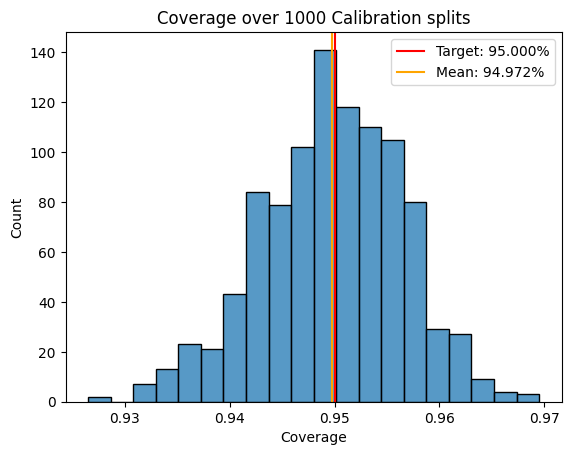

In [17]:
sns.histplot(coverages, bins=20)
plt.axvline(x=DELTA, color="red", label=f"Target: {DELTA:.3%}")
plt.axvline(x=np.mean(coverages), color="orange", label=f"Mean: {np.mean(coverages):.3%}")
plt.title("Coverage over 1000 Calibration splits")
plt.xlabel("Coverage")
plt.ylabel("Count")
plt.legend()